# LaTEX Figure Formatting (Optional)

In [51]:
from google.colab import output, files

In [52]:
! sudo apt-get install texlive-latex-recommended #1
! sudo apt-get install dvipng texlive-fonts-recommended #2
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8
output.clear()

In [53]:
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
output.clear()

# Main Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def f_Y_T(y,T):
  if y <= 0 or y >= 1:
    out = 0
  else:
    out = T + (2-2*T)*y
  return out

In [83]:
def get_pmf_Y_T(Y_values:np.ndarray,T:float) -> np.ndarray:
  pmf = np.array([f_Y_T(y,T) for y in Y_values])
  pmf = pmf / np.sum(pmf) # normalize to have probability of all points sum to 1
  diff = 1 - np.sum(pmf)
  pmf[-1] += diff # get the pmf to sum to 1
  diff = 1 - np.sum(pmf)
  pmf[-1] += diff # get the pmf to sum to 1
  assert np.sum(pmf) == 1, 'PMF must sum to 1!'
  return pmf

In [84]:
def gen_yi(Theta_samples:np.ndarray, Y_values:np.ndarray,n:int):
  N = len(Theta_samples)
  Y_out = []
  for i in range(N):
    t = Theta_samples[i]
    pmf = get_pmf_Y_T(Y_values=Y_values, T=t)
    Y = np.random.choice(Y_values,(n,),p=pmf)
    Y_out.append(Y)
  return np.array(Y_out)

In [ ]:
N = 100
m = 1000
n = 10**6
L = np.linspace(0,1,m+2)[1:-1]
Theta_samples = np.random.choice(L,(N,))
Y_values = np.linspace(0,1,n+2)[1:-1]
test = gen_yi(Theta_samples,Y_values,n)

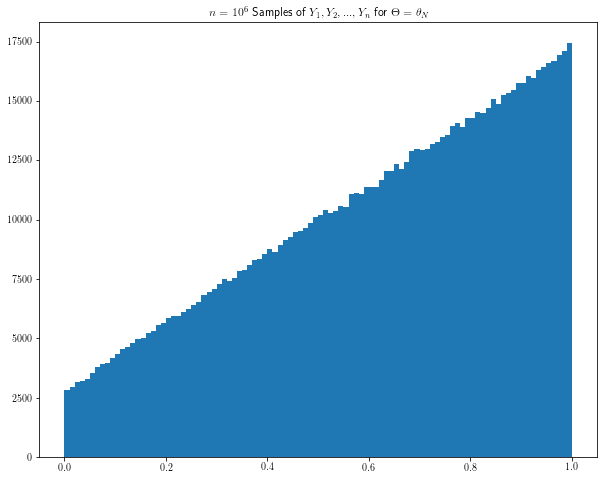

In [82]:
plt.figure(1, figsize=(10,8))
plt.hist(test[-1,:],bins=100)
plt.title(r'$n=10^6$ Samples of $Y_1, Y_2, ..., Y_n$ for $\Theta = \theta_{N}$')
plt.show()

In [73]:
def h_map_LMS(L:np.ndarray,Y_matrix:np.ndarray):
  for li in L: # iterate over all lambda
    Y_matrix[]

SyntaxError: ignored